In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from catboost import Pool
from catboost import CatBoostRegressor
import pandas as pd
import numpy as np
import missingno as msno

In [265]:
df = pd.read_csv('../data/raw/ames.csv')

In [266]:
df.columns = df.columns.str.replace(' ', '')
df = df.drop(['Order','PID'], axis = 1)
df

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [267]:
df.describe()

,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [268]:
numerical_features = df.select_dtypes(include=[int, float]).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Understanding data

/var/folders/0b/t7v75s011nxd0q97zmc5_fm80000gn/T/ipykernel_17893/3462674342.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], kde=True)


<Axes: xlabel='SalePrice', ylabel='Density'>

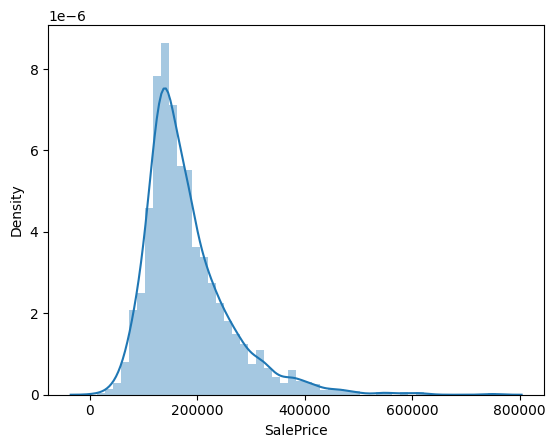

In [269]:
sns.distplot(df['SalePrice'], kde=True)

array([[<Axes: title={'center': 'MS.SubClass'}>,
        <Axes: title={'center': 'Lot.Frontage'}>,
        <Axes: title={'center': 'Lot.Area'}>,
        <Axes: title={'center': 'Overall.Qual'}>,
        <Axes: title={'center': 'Overall.Cond'}>,
        <Axes: title={'center': 'Year.Built'}>],
       [<Axes: title={'center': 'Year.Remod.Add'}>,
        <Axes: title={'center': 'Mas.Vnr.Area'}>,
        <Axes: title={'center': 'BsmtFin.SF.1'}>,
        <Axes: title={'center': 'BsmtFin.SF.2'}>,
        <Axes: title={'center': 'Bsmt.Unf.SF'}>,
        <Axes: title={'center': 'Total.Bsmt.SF'}>],
       [<Axes: title={'center': 'X1st.Flr.SF'}>,
        <Axes: title={'center': 'X2nd.Flr.SF'}>,
        <Axes: title={'center': 'Low.Qual.Fin.SF'}>,
        <Axes: title={'center': 'Gr.Liv.Area'}>,
        <Axes: title={'center': 'Bsmt.Full.Bath'}>,
        <Axes: title={'center': 'Bsmt.Half.Bath'}>],
       [<Axes: title={'center': 'Full.Bath'}>,
        <Axes: title={'center': 'Half.Bath'}>,
    

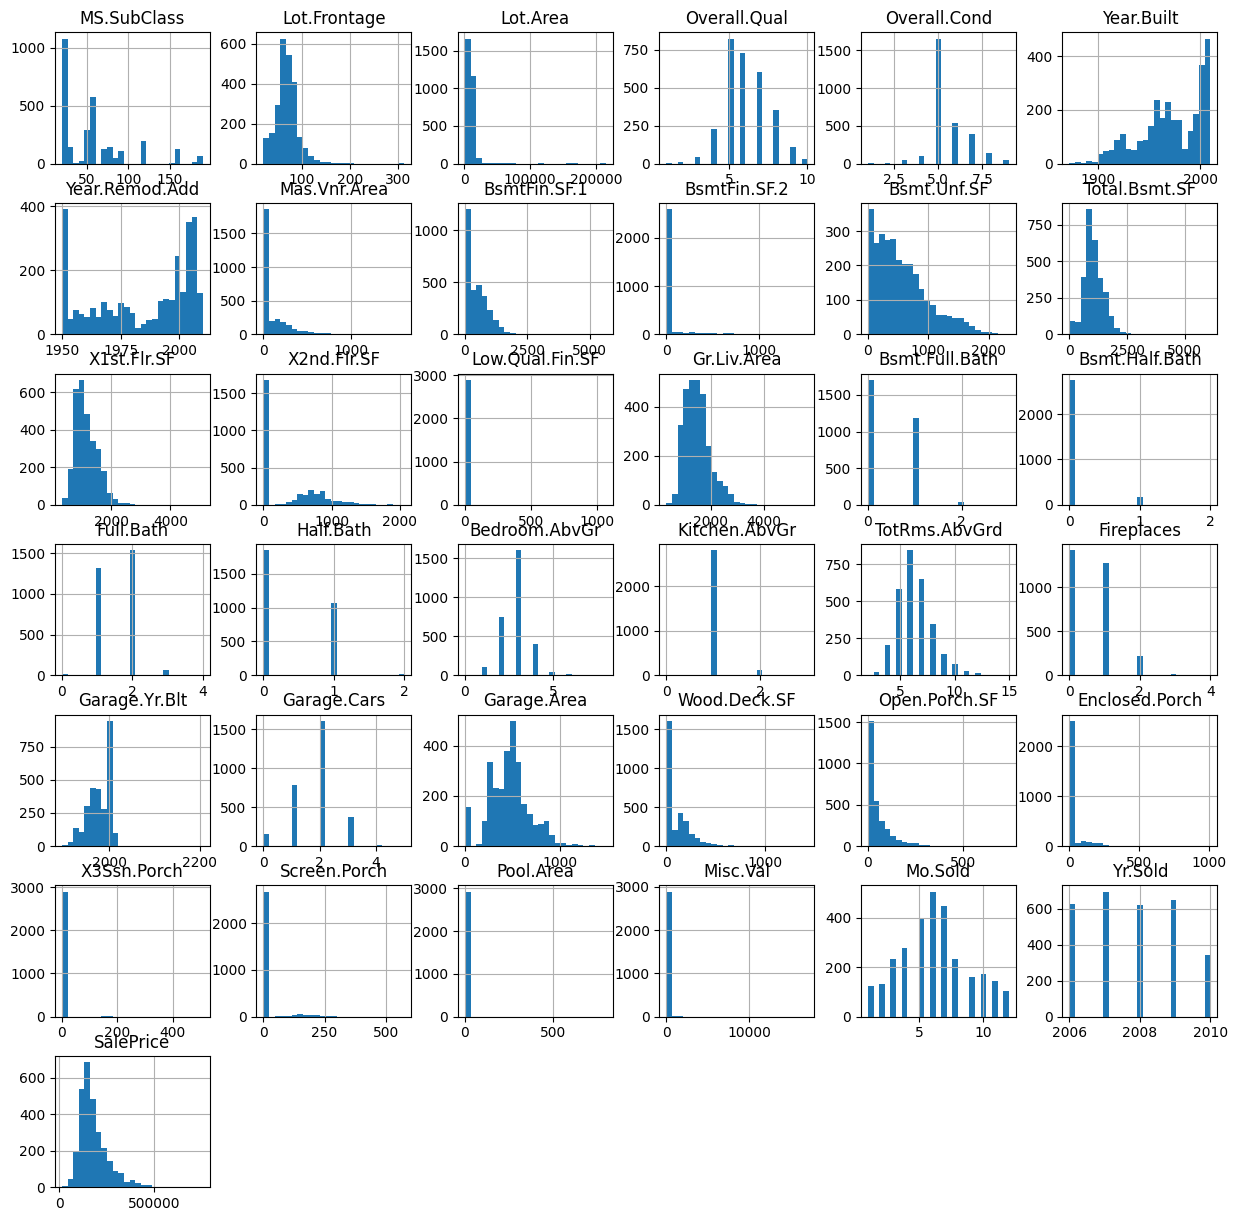

In [270]:
df[numerical_features].hist(bins=25, figsize=(15, 15))

## Pairplots

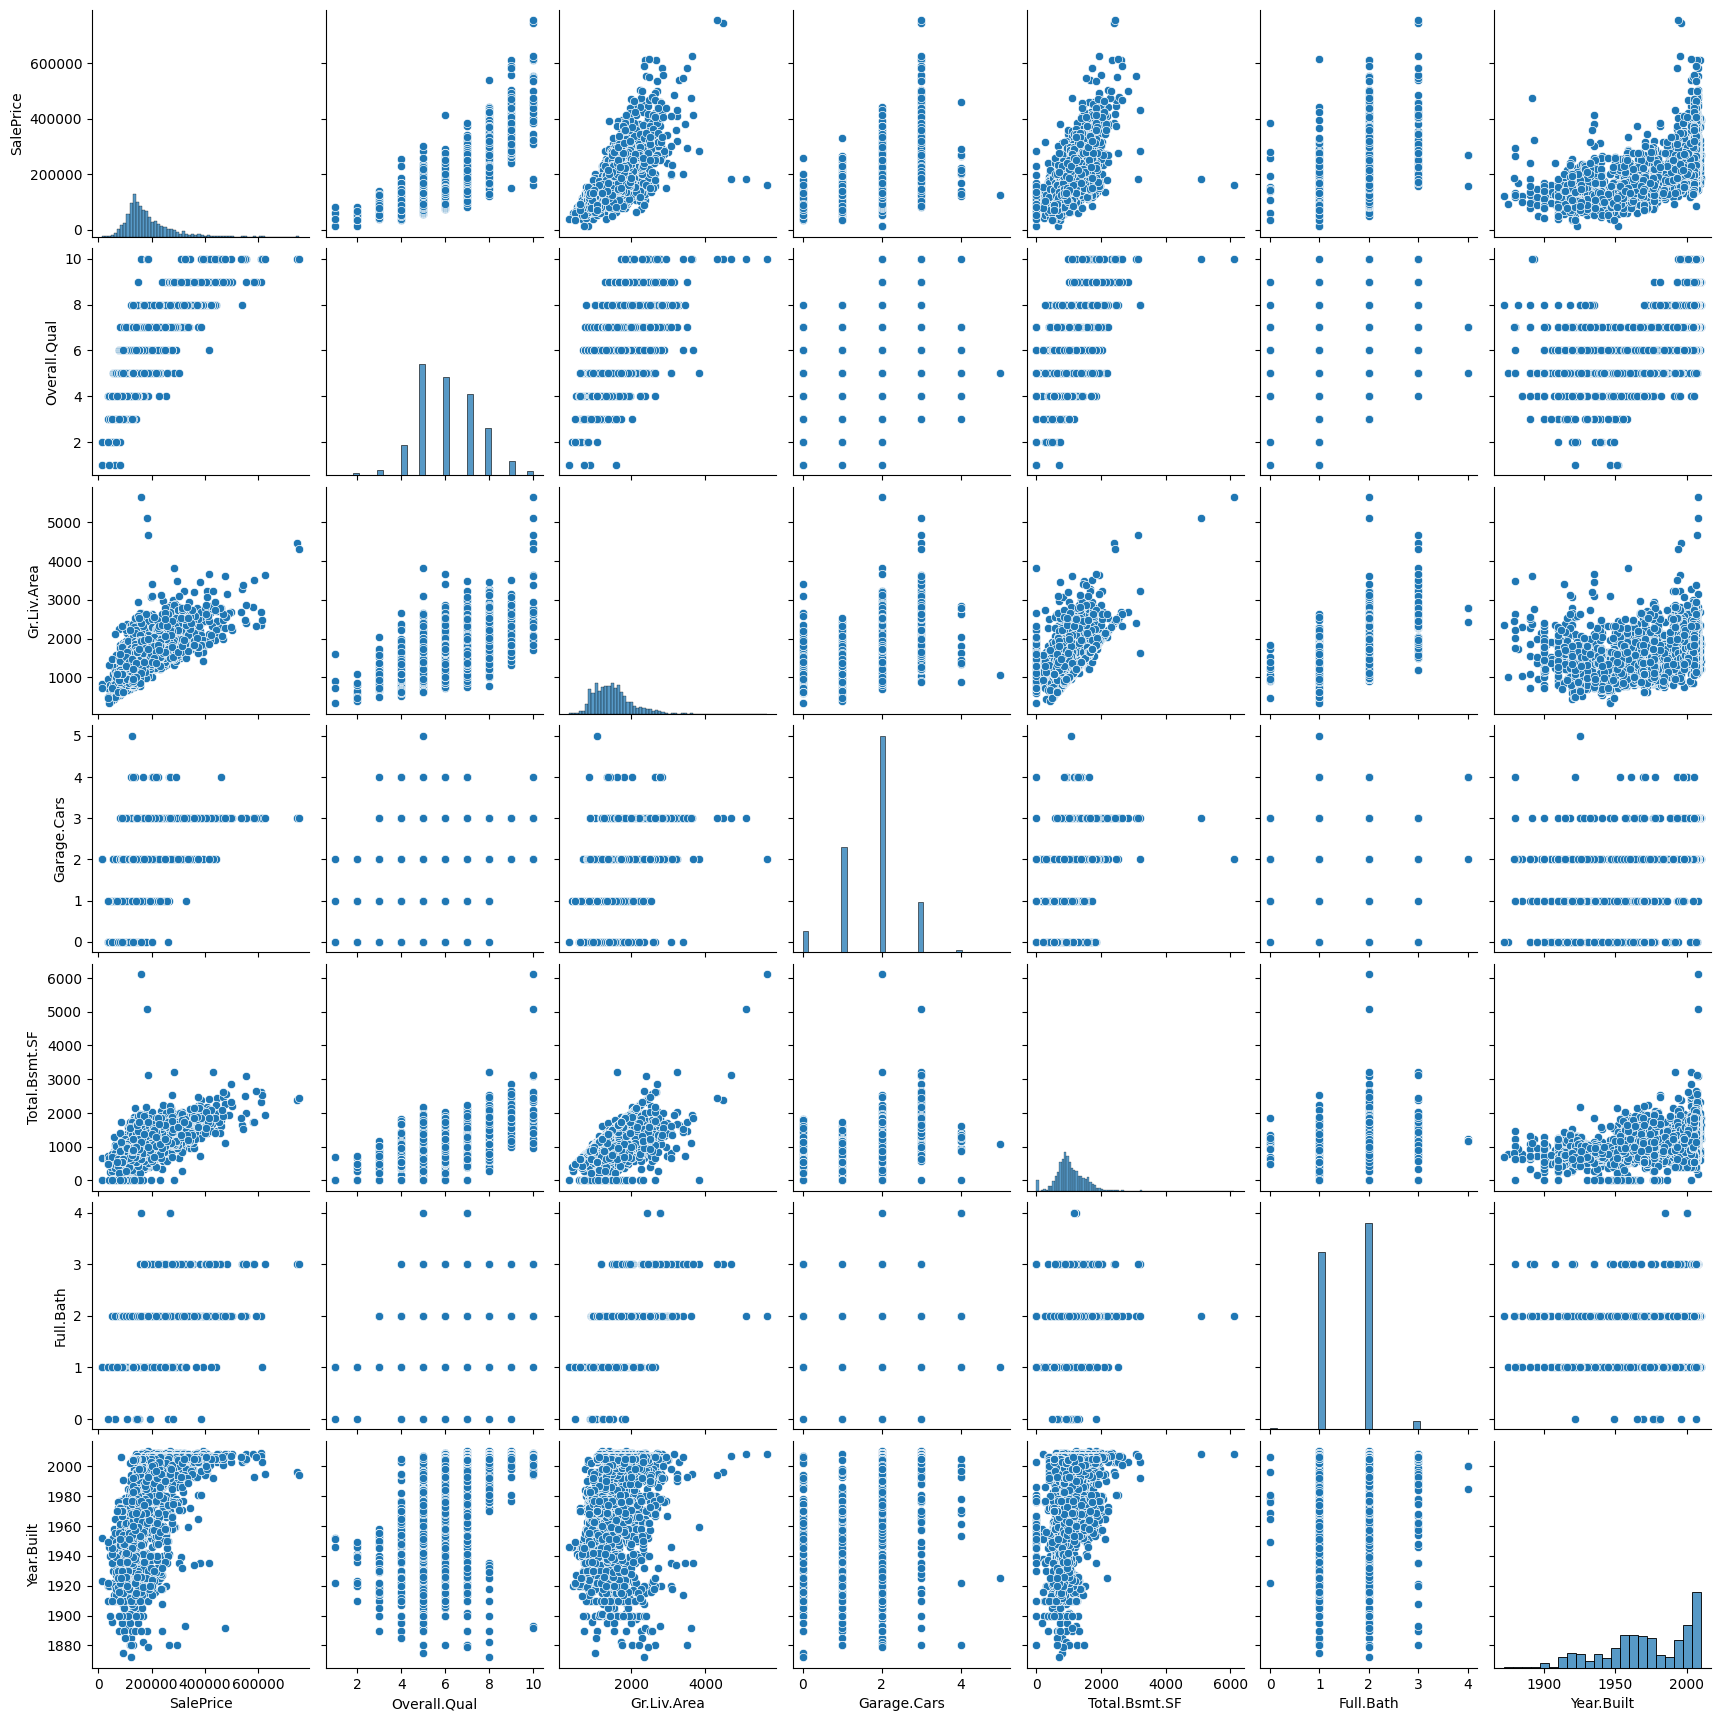

In [271]:
selected_features = ['SalePrice', 'Overall.Qual', 'Gr.Liv.Area', 'Garage.Cars', 'Total.Bsmt.SF', 'Full.Bath', 'Year.Built']
sns.pairplot(df[selected_features])

### GrLivArea

<Axes: xlabel='Gr.Liv.Area', ylabel='SalePrice'>

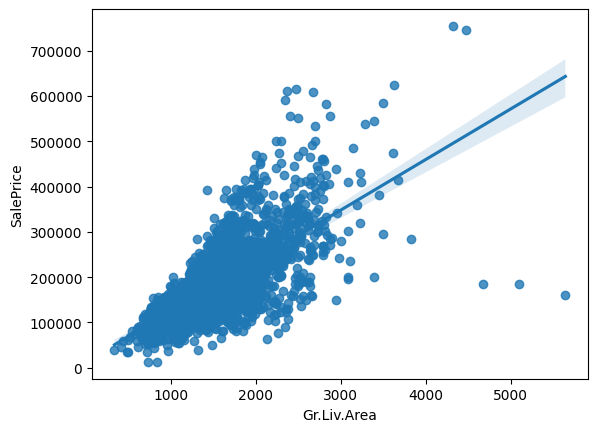

In [272]:
sns.regplot(data=df, x='Gr.Liv.Area', y='SalePrice')

### TotalBsmtSF

<Axes: xlabel='Total.Bsmt.SF', ylabel='SalePrice'>

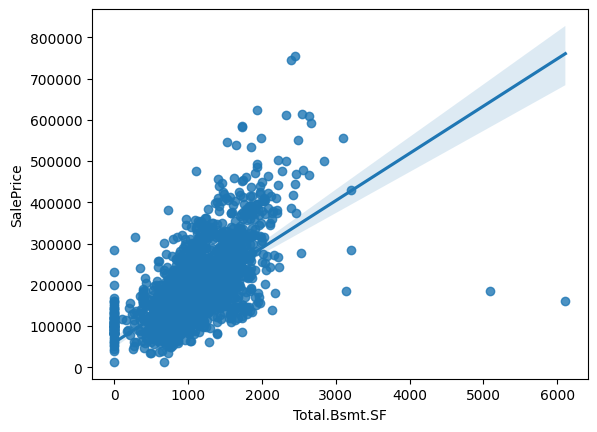

In [273]:
sns.regplot(data=df, x='Total.Bsmt.SF', y='SalePrice')

### OverQuall

<Axes: xlabel='Overall.Qual', ylabel='SalePrice'>

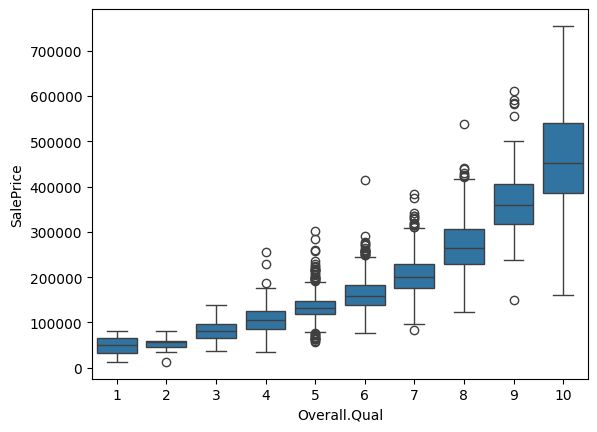

In [274]:
sns.boxplot(data=df, y='SalePrice', x='Overall.Qual')

### YearBuilt

<Axes: xlabel='Year.Built', ylabel='SalePrice'>

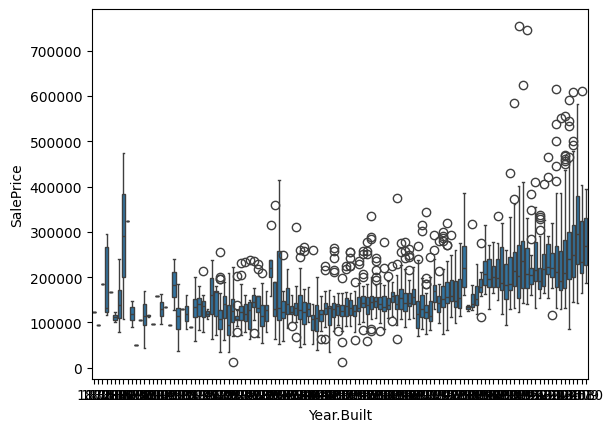

In [275]:
sns.boxplot(data=df, x='Year.Built', y='SalePrice')

# Preprocessing

In [276]:
# Converting non-numeric predictors stored as numbers into string
df['MSSubClass'] = df['MS.SubClass'].apply(str)
df['YrSold'] = df['Yr.Sold'].apply(str)
df['MoSold'] = df['Mo.Sold'].apply(str)

In [277]:
df['Functional'] = df['Functional'].fillna('Typ')
df['Electrical'] = df['Electrical'].fillna("SBrkr")
df['Kitchen.Qual'] = df['Kitchen.Qual'].fillna("TA")
df['Exterior.1st'] = df['Exterior.1st'].fillna(df['Exterior.1st'].mode()[0])
df['Exterior.2nd'] = df['Exterior.2nd'].fillna(df['Exterior.2nd'].mode()[0])
df['Sale.Type'] = df['Sale.Type'].fillna(df['Sale.Type'].mode()[0])
df["Pool.QC"] = df["Pool.QC"].fillna("None")
df["Alley"] = df["Alley"].fillna("None")
df['Fireplace.Qu'] = df['Fireplace.Qu'].fillna("None")
df['Fence'] = df['Fence'].fillna("None")
df['Misc.Feature'] = df['Misc.Feature'].fillna("None")

for col in ('Garage.Area', 'Garage.Cars'):
    df[col] = df[col].fillna(0)
        
for col in ['Garage.Type', 'Garage.Finish', 'Garage.Qual', 'Garage.Cond']:
    df[col] = df[col].fillna('None')
    
for col in ('Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2'):
    df[col] = df[col].fillna('None')

### Removing the unneeded features

In [278]:
useless = ['Garage.Yr.Blt', 'Year.Remod.Add'] 
df.drop(useless, axis=1, inplace=True)

### Check columns with missing values

In [279]:
missing_values = df.isnull().sum()
columns_with_missing = missing_values[missing_values > 0].index.tolist()
columns_with_missing = [col for col in columns_with_missing if df[col].isnull().any()]

print("Columns with missing values:", columns_with_missing)

Columns with missing values: ['Lot.Frontage', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath']


### Imputation

In [280]:
def impute_knn(df):
    ttn = df.select_dtypes(include=[np.number])
    ttc = df.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ttn, ttc],axis=1)

train_test = impute_knn(df)

In [281]:
objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))
         
train_test[columns_with_missing].isna().sum()

Lot.Frontage      0
Mas.Vnr.Type      0
Mas.Vnr.Area      0
BsmtFin.SF.1      0
BsmtFin.SF.2      0
Bsmt.Unf.SF       0
Total.Bsmt.SF     0
Bsmt.Full.Bath    0
Bsmt.Half.Bath    0
dtype: int64

# Feature Engineering

In [282]:
df["SqFtPerRoom"] = df["Gr.Liv.Area"] / (df["TotRms.AbvGrd"] +
                                                       df["Full.Bath"] +
                                                       df["Half.Bath"] +
                                                       df["Kitchen.AbvGr"])

df['Total_Home_Quality'] = df['Overall.Qual'] + df['Overall.Cond']

df['Total_Bathrooms'] = (df['Full.Bath'] + (0.5 * df['Half.Bath']) +
                               df['Bsmt.Full.Bath'] + (0.5 * df['Bsmt.Half.Bath']))

df["HighQualSF"] = df["Gr.Liv.Area"] + df["X1st.Flr.SF"] + df["X2nd.Flr.SF"] + 0.5 * df["Garage.Area"] + 0.5 * df["Total.Bsmt.SF"] + 1 * df["Mas.Vnr.Area"]


# df.drop(['Gr.Liv.Area', 'TotRms.AbvGrd', 'Full.Bath', 'Half.Bath', 'Kitchen.AbvGr', 'Overall.Qual', 'Overall.Cond', 'Full.Bath', 'Half.Bath', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Garage.Area', 'Total.Bsmt.SF', 'Mas.Vnr.Area'], axis=1, inplace=True)

### One Hot Encoding

In [283]:
df_dummy = pd.get_dummies(train_test)
df_dummy

,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,...,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
0,20,141.0,31770,6,5,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,False,True,False,False,False,False
1,20,80.0,11622,5,6,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,False,False,True,False,False,False
2,20,81.0,14267,6,6,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,False,False,True,False,False,False
3,20,93.0,11160,7,5,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,False,False
4,60,74.0,13830,5,5,1997,0.0,791.0,0.0,137.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.0,7937,6,6,1984,0.0,819.0,0.0,184.0,...,False,False,False,True,False,False,False,False,False,False
2926,20,62.6,8885,5,5,1983,0.0,301.0,324.0,239.0,...,False,False,False,False,False,False,True,False,False,False
2927,85,62.0,10441,5,5,1992,0.0,337.0,0.0,575.0,...,False,False,False,False,False,False,False,True,False,False
2928,20,77.0,10010,5,5,1974,0.0,1071.0,123.0,195.0,...,False,False,False,False,True,False,False,False,False,False


### Remove skew

In [284]:
numeric_features = df_dummy.dtypes[df_dummy.dtypes != object].index
skewed_features = df_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
    
for i in skew_index:
    df_dummy[i] = np.log1p(df_dummy[i])

### Log Transform Target (SalePrice)

/var/folders/0b/t7v75s011nxd0q97zmc5_fm80000gn/T/ipykernel_17893/669990065.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_log, kde=True, hist=True, fit=norm, ax=ax[1])


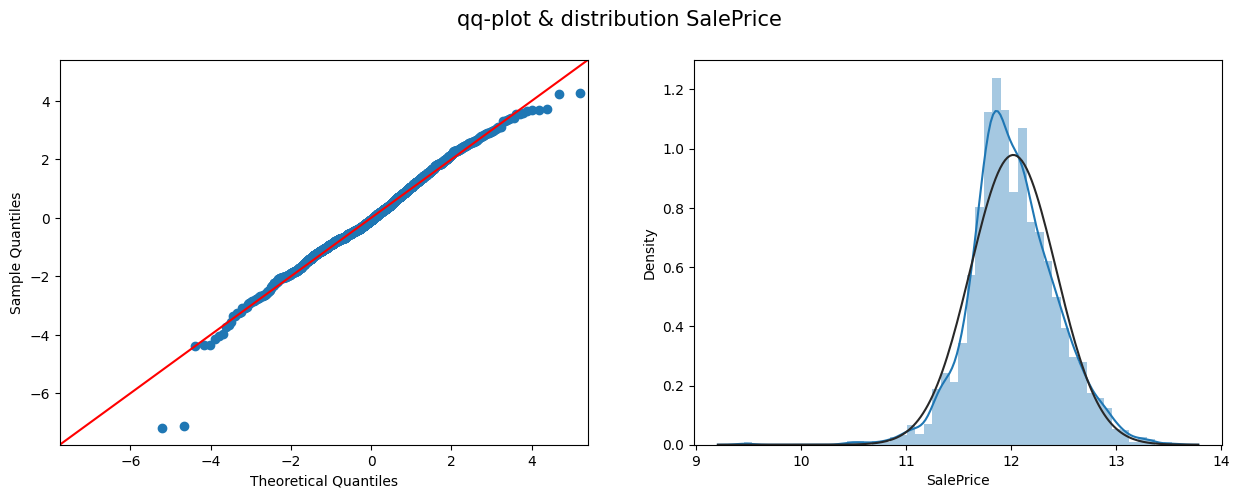

In [285]:
target = df['SalePrice']
target_log = np.log1p(target)

fig, ax = plt.subplots(1, 2, figsize= (15, 5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize=15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax=ax[0])
sns.distplot(target_log, kde=True, hist=True, fit=norm, ax=ax[1])
plt.show()

### Log Transform HighQualSF

In [286]:
HighQualSF_log = df['HighQualSF']
HighQualSF_log = np.log1p(HighQualSF_log)

In [287]:
df.columns

Index(['MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street',
       'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config',
       'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type',
       'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built',
       'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd',
       'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond',
       'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath',
       'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual',
       'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu',
       'Garage.Type', 'Garage.Finish', 'Garage.Cars', 'Garage.Area',
       '

### Log Tranform GrLivArea

/var/folders/0b/t7v75s011nxd0q97zmc5_fm80000gn/T/ipykernel_17893/2674672194.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GrLivArea_log, kde=True, hist=True, fit = norm, ax=ax[1])


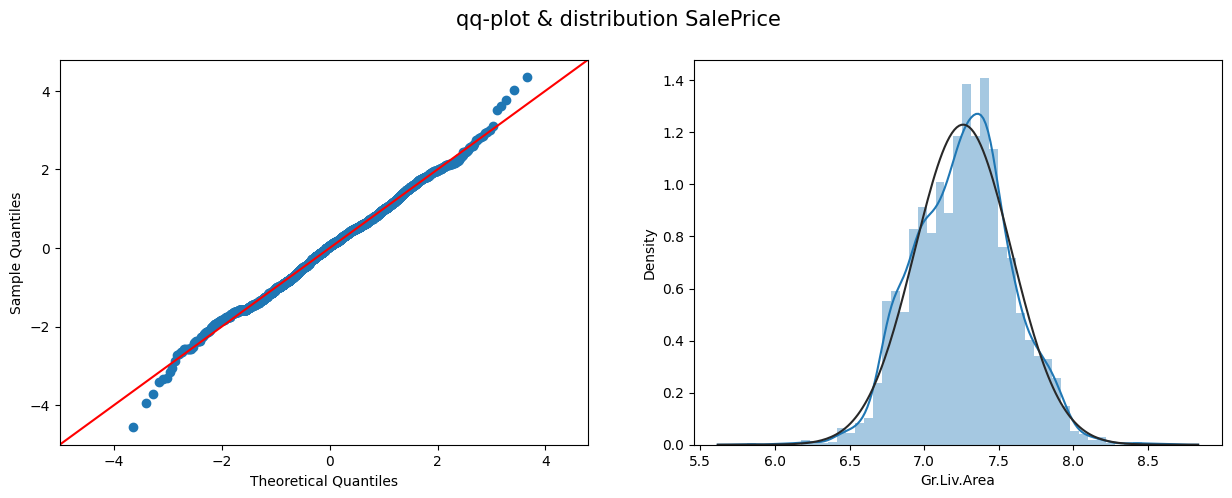

In [288]:
GrLivArea_log = np.log1p(df['Gr.Liv.Area'])

fig, ax = plt.subplots(1, 2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize=15)

sm.qqplot(GrLivArea_log, stats.t, distargs=(4,), fit=True, line="45", ax=ax[0])
sns.distplot(GrLivArea_log, kde=True, hist=True, fit = norm, ax=ax[1])
plt.show()

df['Gr.Liv.Area']= GrLivArea_log

# Split back to Train and test

In [289]:
train = df_dummy[0:2930]
test = df_dummy[2930:]
test.drop('SalePrice', axis=1, inplace=True)

/var/folders/0b/t7v75s011nxd0q97zmc5_fm80000gn/T/ipykernel_17893/129565750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('SalePrice', axis=1, inplace=True)


In [290]:
ytrain = target_log
xtrain = train.drop('SalePrice', axis=1)

X_train_, X_val, y_train_, y_val = train_test_split(xtrain, ytrain, test_size=0.5, random_state=42)
X_train_, y_train_ = xtrain, ytrain
X_train

,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,...,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
381,3.044522,4.394449,9.249657,7,1.791759,1976,5.247024,0.000000,0.000000,6.994850,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.693359,0.0,0.0,0.0
834,4.110874,4.304065,10.264618,5,1.791759,1967,0.000000,5.521461,6.639876,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.693359,0.0,0.0,0.0
1898,4.510860,4.262680,9.194516,4,1.791759,1962,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.693359,0.000000,0.000000,0.000000,0.0,0.0,0.0
678,4.510860,4.110874,8.881975,4,1.791759,1949,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.693359,0.0,0.0,0.0
700,5.252273,4.158883,8.939581,4,1.945910,1920,0.000000,0.000000,0.000000,6.398595,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,5.252273,5.278115,10.635879,5,1.791759,1969,0.000000,6.954639,0.000000,3.988984,...,0.693359,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1095,4.110874,4.127134,8.955577,7,1.791759,2002,2.151762,0.000000,0.000000,6.562444,...,0.000000,0.0,0.0,0.000000,0.693359,0.000000,0.000000,0.0,0.0,0.0
1130,4.110874,4.174387,9.081597,6,1.791759,2003,0.000000,6.222576,0.000000,5.891644,...,0.000000,0.0,0.0,0.000000,0.000000,0.693359,0.000000,0.0,0.0,0.0
1294,3.931826,4.406719,8.896862,5,1.791759,1920,0.000000,5.888878,0.000000,6.357842,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.693359,0.0,0.0,0.0


In [291]:
X_val

,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,...,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
1357,4.262680,3.887730,8.537192,8,2.079442,1925,0.000000,0.000000,0.000000,6.378426,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.693359,0.000000,0.000000,0.0
2367,5.081404,3.091042,7.544861,6,2.079442,1972,5.942799,5.645447,0.000000,5.361292,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.693359,0.000000,0.0
2822,4.110874,4.143135,8.876684,7,1.791759,2003,5.252273,0.000000,0.000000,6.680855,...,0.0,0.0,0.000000,0.0,0.0,0.693359,0.000000,0.000000,0.000000,0.0
2126,3.044522,4.110874,8.996033,4,1.791759,1994,0.000000,6.378426,0.000000,5.998937,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.693359,0.0
1544,3.433987,3.931826,8.853808,6,2.197225,1926,0.000000,5.703782,3.713572,6.320768,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.693359,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,3.044522,4.709530,9.643291,7,1.791759,1981,0.000000,4.804021,0.000000,7.390181,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.693359,0.000000,0.000000,0.0
2243,3.044522,4.189655,8.789660,4,1.945910,1957,0.000000,6.875232,0.000000,4.672829,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.693359,0.0
339,3.044522,4.343805,9.199583,8,1.791759,1994,0.000000,7.201916,5.652489,4.007333,...,0.0,0.0,0.693359,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2498,4.394449,4.615121,9.570180,7,1.609438,1974,4.983607,6.931472,6.210600,5.433722,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


# Modeling

In [301]:
# best_params = {'max_leaves': 8,
#           'depth': 3,
#           'od_wait': 200,
#           'l2_leaf_reg': 3,
#           'iterations': 200000,
#           'model_size_reg': 0.7,
#           'learning_rate': 0.05,
#           'random_seed': 42 }
# final_model = CatBoostRegressor(**best_params)

# final_model = CatBoostRegressor(max_leaves=8, depth=3, od_wait=200, l2_leaf_reg=3, iterations=200000, model_size_reg=0.7, learning_rate=0.05, random_seed=42)
final_model = CatBoostRegressor(max_leaves=8, depth=3, od_wait=200, l2_leaf_reg=3, iterations=9000, model_size_reg=0.7, learning_rate=0.05, random_seed=42)

In [302]:
final_model.fit(X_train_, y_train_, eval_set=(X_val, y_val), verbose=False)

In [303]:
final_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 9000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.699999988079071,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'od_wait': 200,
 'random_seed': 42,
 'depth': 3,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_

In [304]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [305]:
final_pred = final_model.predict(X_val)

In [306]:
final_score = rmse(y_val, final_pred)
final_score

0.027596056061029533

In [307]:
print(f"Average error in CatBoost is {100 * (10**final_score - 1):.2f}%")

Average error in CatBoost is 6.56%


# Checking Overfitting

In [308]:
def check_overfitting(train_score, validation_score, threshold=0.1):
    """
    Checks if a model is overfitting based on the difference between training and validation scores.

    Parameters:
    - train_score (float): Metric score on the training data.
    - validation_score (float): Metric score on the validation data.
    - threshold (float): Threshold for the acceptable difference between training and validation scores.

    Returns:
    - bool: True if the model is overfitting, False otherwise.
    """
    return (train_score - validation_score) > threshold


In [309]:
check_overfitting(final_model.score(X_train, y_train), final_model.score(X_val, y_val))

train_error = final_model.get_best_score()['learn']['RMSE']
val_error = final_model.get_best_score()['validation']['RMSE']

train_error, val_error

(0.027714125331291885, 0.027596057938428304)